<a href="https://colab.research.google.com/github/muhammadbabarkamal/ML_PCA_Feature_reduction/blob/main/ML_Assingment_2_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
print(df.dtypes)
print(df.columns)
print("Data shape:",df.shape)
print(df.head())
print(df.describe())
print(df.info())

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Data shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0  

Null Compunents Analysis

In [4]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


***************************************
VISUALIZATIONS THE DATA SET
***************************************

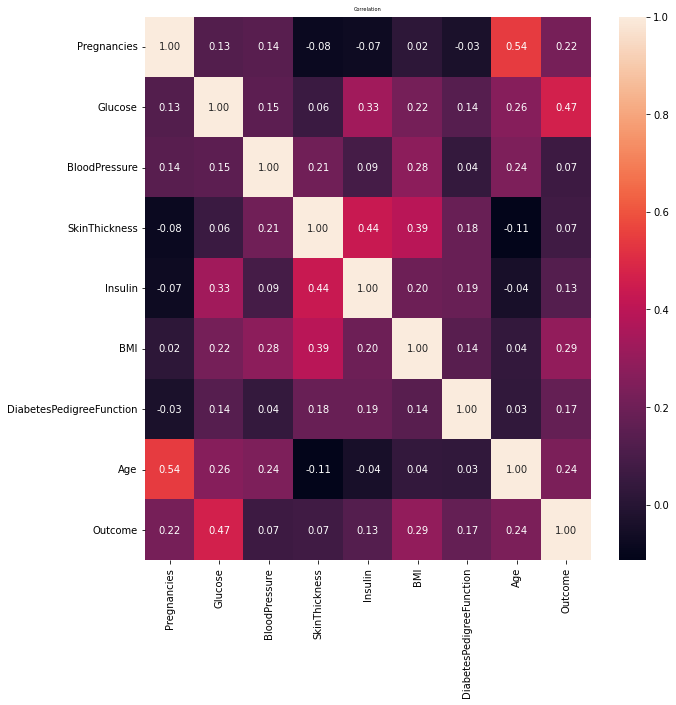

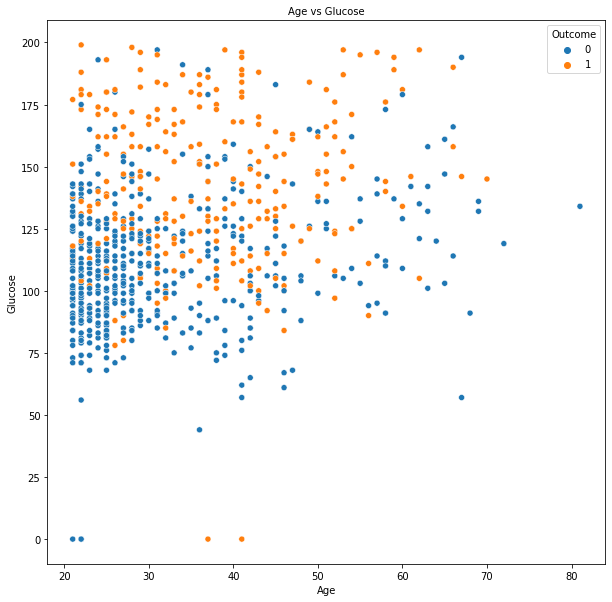

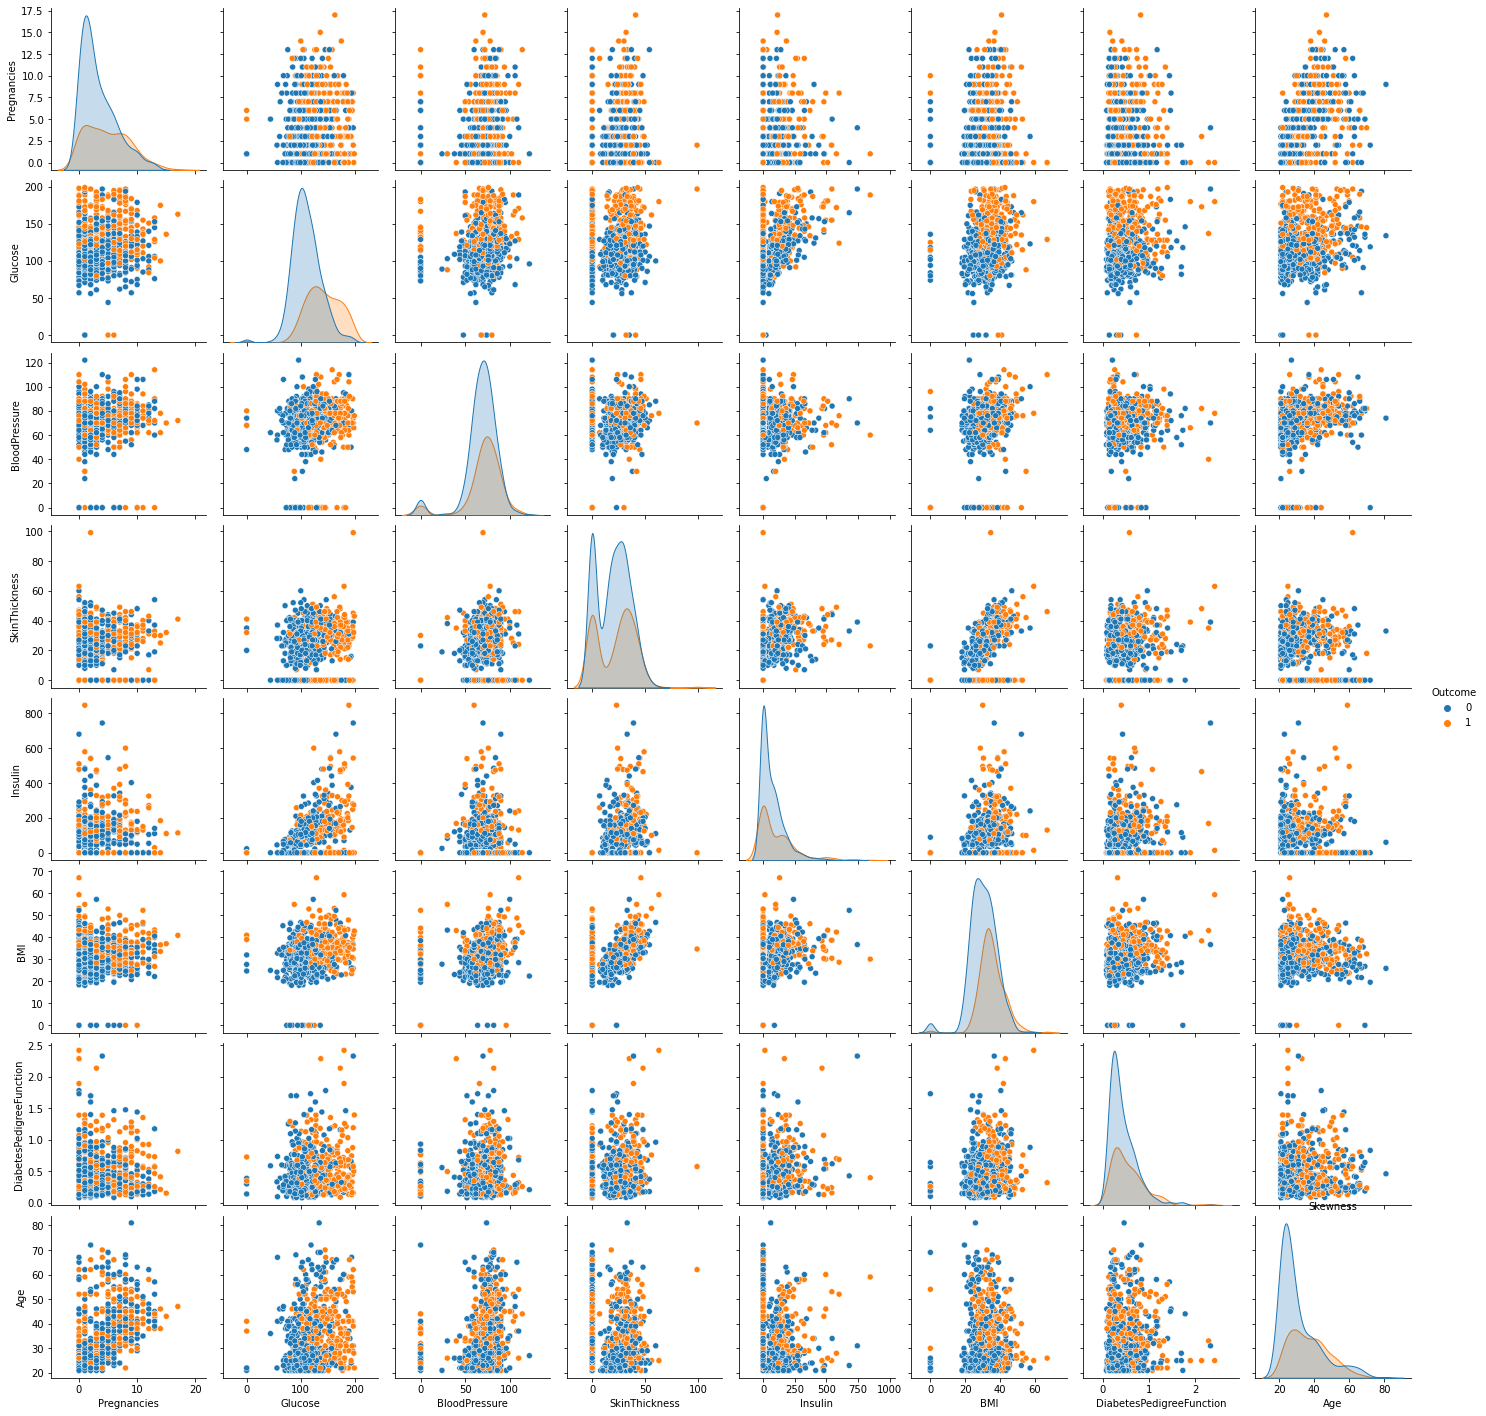

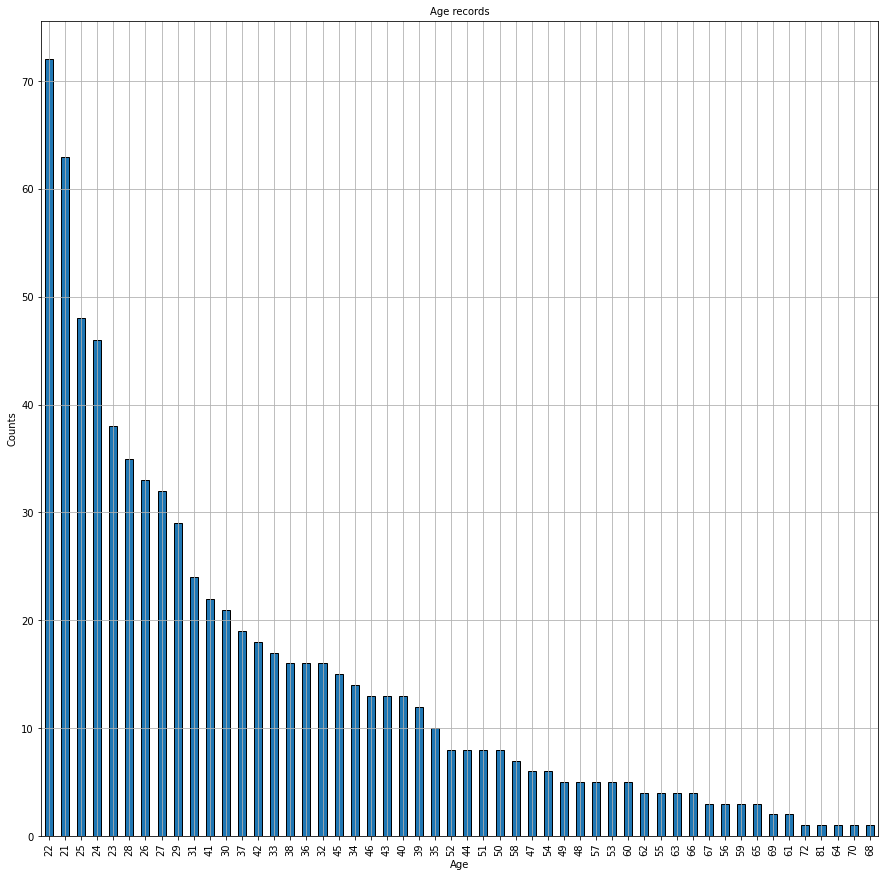

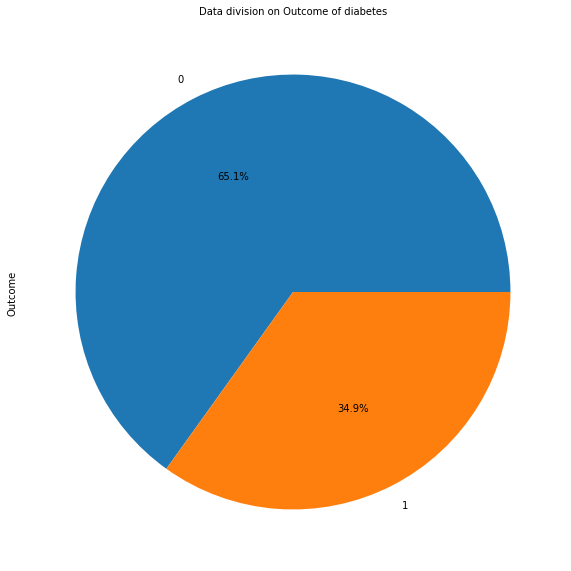

In [5]:


fig = plt.figure(figsize = (10,10))
ax = fig.gca()
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Correlation",fontsize=5)
plt.show()

fig = plt.figure(figsize = (10,10))
ax = fig.gca()
sns.scatterplot(x="Age", y="Glucose", hue="Outcome",data=df)
plt.title("Age vs Glucose",fontsize =10)
plt.show()


sns.pairplot(data=df,hue="Outcome")
plt.title("Skewness",fontsize =10)
plt.show()

fig = plt.figure(figsize=(15,15))
ax = fig.gca()
df['Age'].value_counts().sort_values(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=1)
plt.xlabel('Age',fontsize=10)
plt.ylabel('Counts',fontsize=10)
ax.tick_params(labelsize=10)
plt.title('Age records',fontsize=10)
plt.grid()
plt.ioff()


plt.figure( figsize=(10,10))
df['Outcome'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Data division on Outcome of diabetes",fontsize=10)
plt.show()
length  = len(df.columns[:-1])
colors  = ["r","g","b","m","y","c","k","orange"] 



***************************************
DISTIBUTION OF VARIABLES IN DATA SET
***************************************
  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

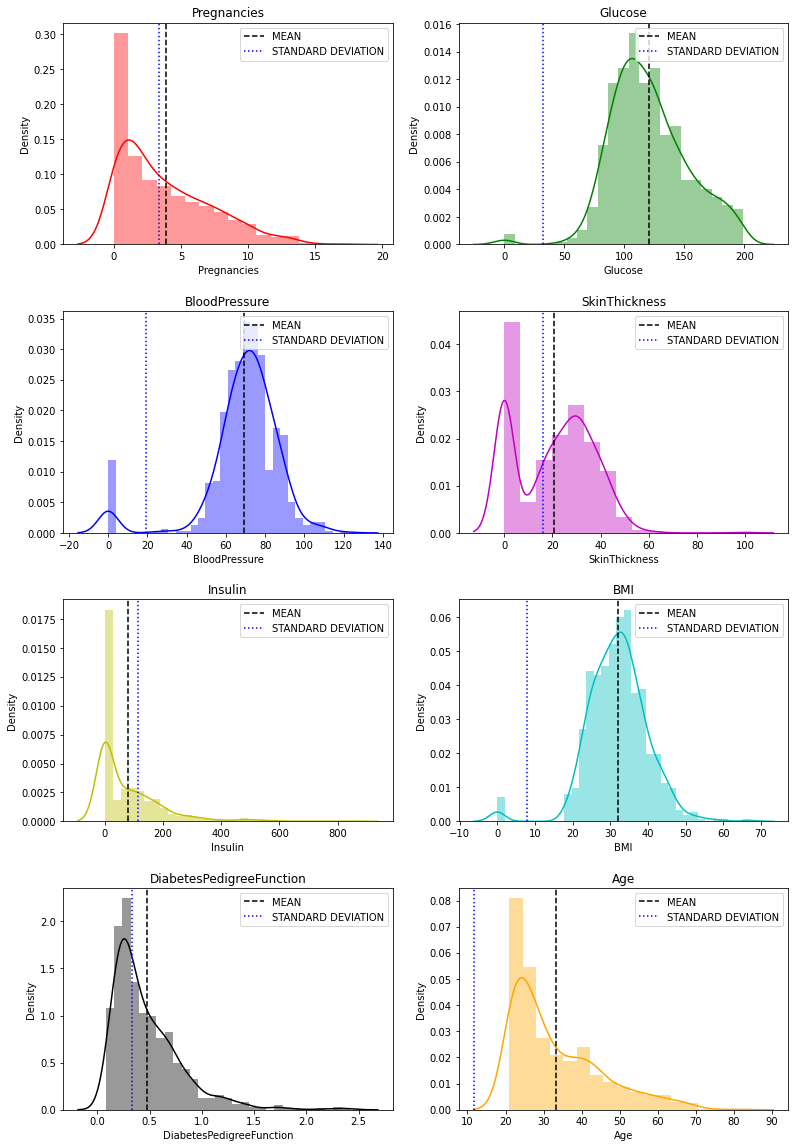

In [6]:

plt.figure(figsize=(13,20))
# Leavout the last column of Outcome
for i,j,k in itertools.zip_longest(df.columns[:-1],range(length),colors):
    plt.subplot(length/2,length/4,j+1)
    sns.distplot(df[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(df[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(df[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
plt.show()    

In [7]:
df.iloc[:,1:].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#Boxplots by output labels/classes
showing corelation between output and Independent variables

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

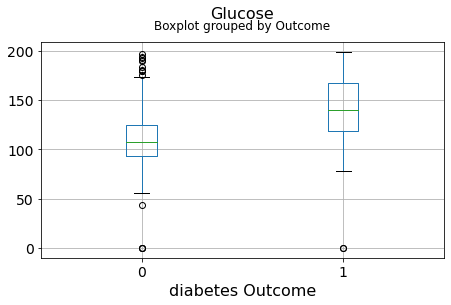

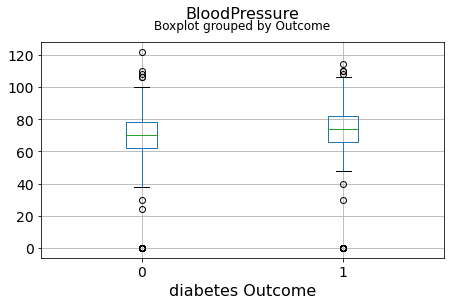

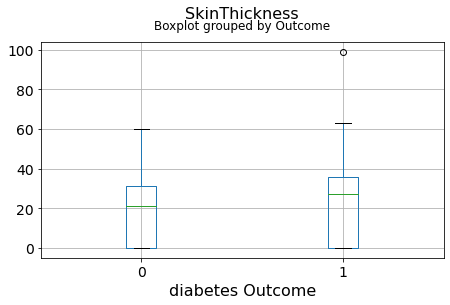

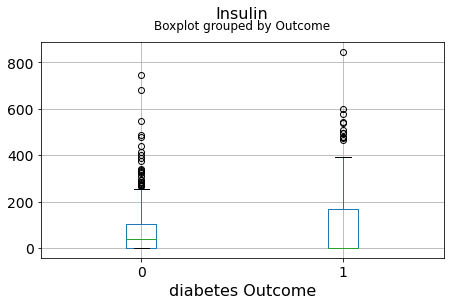

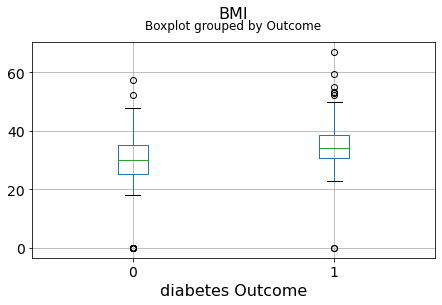

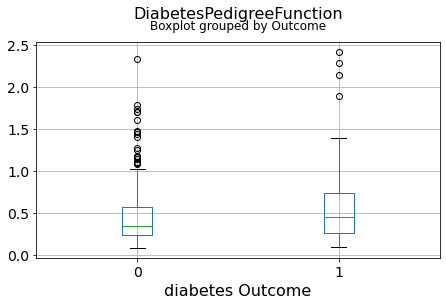

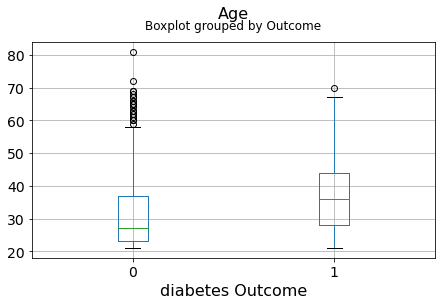

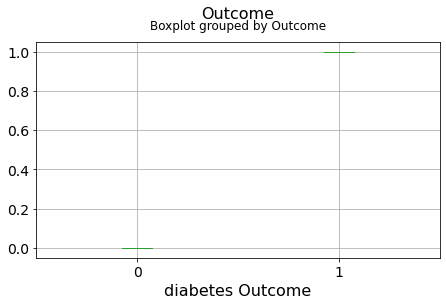

In [8]:
for c in df.columns[1:]:
    df.boxplot(c,by='Outcome',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("diabetes Outcome", fontsize=16)

It can be seen that some features classify the diabetes output pretty clearly. For example, Glucose, BMI, Age, or DiabetesPedigreeFunction produce boxplots with well-separated medians, which are clearly indicative of diabetes.

Below is an example of class seperation using two variables

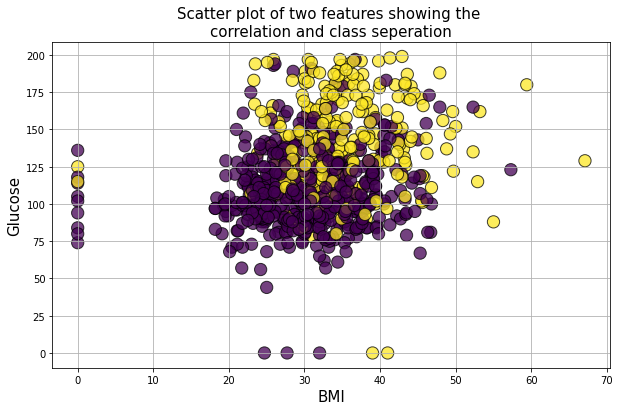

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df['BMI'],df['Glucose'],c=df['Outcome'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("BMI",fontsize=15)
plt.ylabel("Glucose",fontsize=15)
plt.show()

Corelation of variables with eachother in Confusionmatrix

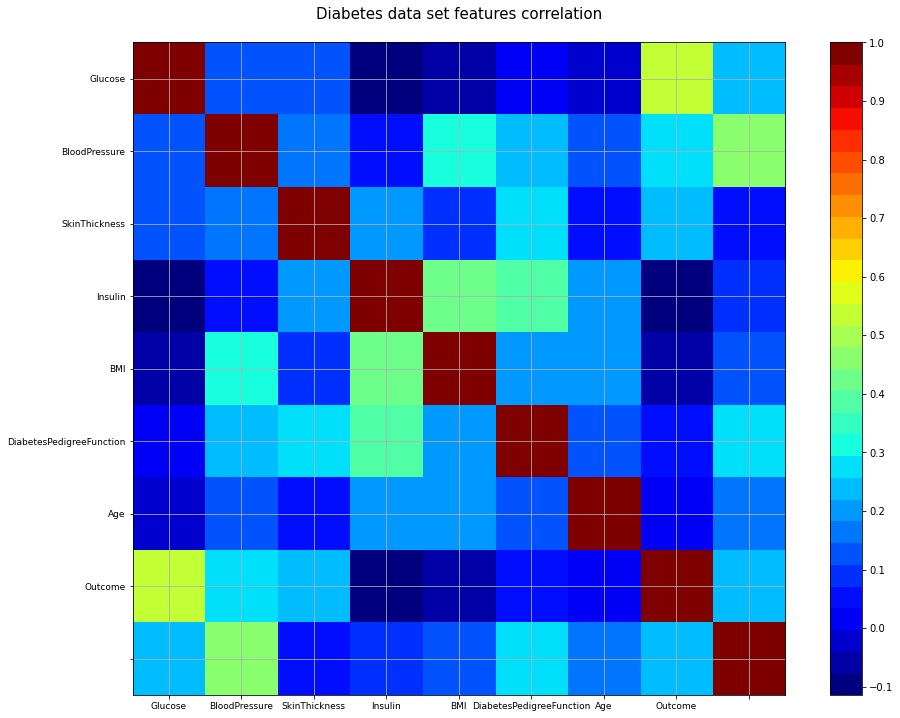

In [10]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Diabetes data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

#Principal Component Analysis
Data scaling
PCA requires scaling/normalization of the data to work properly

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X = df.drop('Outcome',axis=1)
y = df['Outcome']
X = scaler.fit_transform(X)
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

In [13]:
dfx.head(10)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111
7,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847
8,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346


In [14]:
dfx.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,3.614007e-18,-1.327244e-17,7.994184e-17,-3.556183e-17,2.295979e-16,2.462585e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


PCA class import and analysis

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=None)

In [17]:
dfx_pca = pca.fit(dfx)

Plot the explained variance ratio

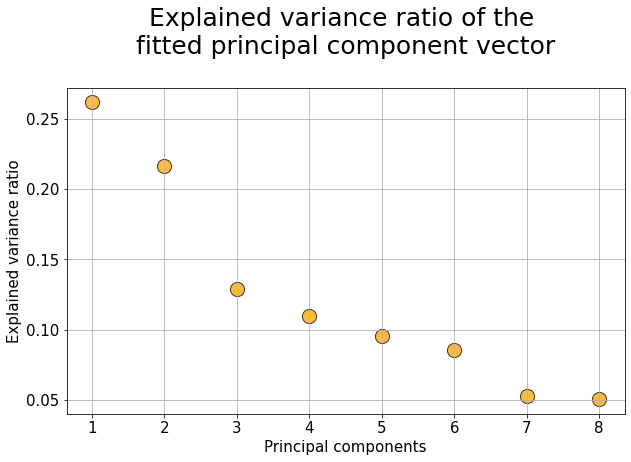

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

The above plot means that the 1st
 principal component explains about 27% of the total variance in the data and the 2nd
 component explians further 22% Third,4th, 5th compunent explains 12.8%,10.9%,9.5% respectively. Therefore, if we just consider first five components, they together explain 81% of the total variance.

Showing better class separation using principal components

Transform the scaled data set using the fitted PCA object

In [19]:
dfx_trans = pca.transform(dfx)

Put it in a data frame

In [20]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7
0,1.068503,1.234895,0.095930,0.496990,-0.109985,0.357183,0.858821,0.974304
1,-1.121683,-0.733852,-0.712938,0.285056,-0.389507,-0.406329,0.757034,0.354215
2,-0.396477,1.595876,1.760678,-0.070395,0.906474,-0.040018,-1.152990,1.068528
3,-1.115781,-1.271241,-0.663729,-0.579123,-0.356060,-0.412520,-0.029247,-0.130648
4,2.359334,-2.184819,2.963107,4.033099,0.592684,1.078341,0.549358,-0.319352
5,-1.435751,0.835577,-0.220332,-0.447845,0.443972,-0.409994,-0.610664,-0.038576
6,-0.930176,-1.107940,-0.536578,-0.144660,-1.251691,0.431165,0.235745,-0.075850
7,-2.149806,0.855902,1.254642,-0.638269,-1.234666,3.164384,-0.834773,-0.235251
8,3.297925,-0.242155,1.870861,-3.034595,-1.102779,-1.089537,1.358092,-0.613251
9,-1.839850,3.206661,0.660732,-0.377021,-0.510051,-3.235222,0.190338,0.857041



Plot the first two columns of this transformed data set with the color set to original ground truth class label

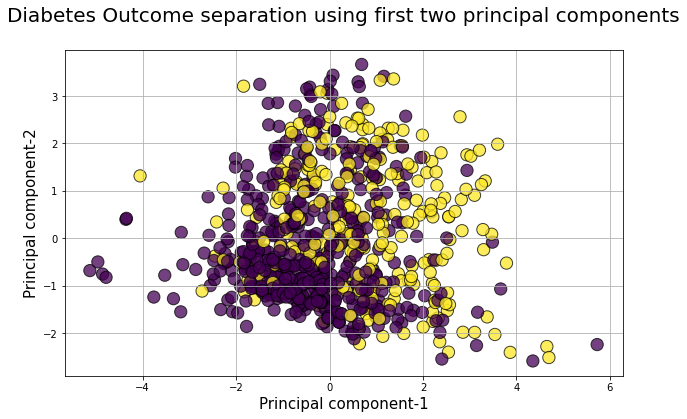

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Outcome'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Diabetes Outcome separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

In [22]:
pca.explained_variance_ratio_

array([0.26179749, 0.21640127, 0.12870373, 0.10944113, 0.09529305,
       0.08532855, 0.05247702, 0.05055776])

In [23]:
feature = ['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# separating features
x = df.loc[:,feature]

# separating target
y = df.loc[:,'Outcome']

#Standardising features
x = StandardScaler().fit_transform(x)

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

pct = pca.fit_transform(x)

principal_df = pd.DataFrame(pct,columns=['pc1','pc2','pc3','pc4','pc5'])

finaldf= pd.concat([principal_df,df[['Outcome']]],axis=1)

In [58]:
finaldf.head()

,pc1,pc2,pc3,pc4,pc5,Outcome
0,1.068503,1.234895,0.095930,0.496990,-0.109985,1
1,-1.121683,-0.733852,-0.712938,0.285056,-0.389507,0
2,-0.396477,1.595876,1.760678,-0.070395,0.906474,1
3,-1.115781,-1.271241,-0.663729,-0.579123,-0.356060,0
4,2.359334,-2.184819,2.963107,4.033099,0.592684,1


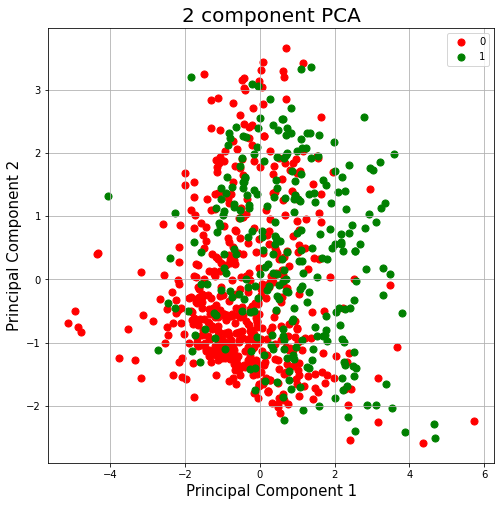

In [59]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['Outcome'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'pc1']
               , finaldf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#Analysis 2

NEWist

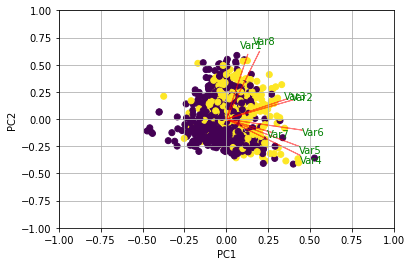

In [60]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

feature = ['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# separating features
X = df.loc[:,feature]

# separating target
y = df.loc[:,'Outcome']

#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [61]:
pca.explained_variance_ratio_

array([0.26179749, 0.21640127, 0.12870373, 0.10944113, 0.09529305,
       0.08532855, 0.05247702, 0.05055776])

In [62]:
print(abs( pca.components_ ))

[[0.1284321  0.39308257 0.36000261 0.43982428 0.43502617 0.45194134
  0.27061144 0.19802707]
 [0.59378583 0.17402908 0.18389207 0.33196534 0.25078106 0.1009598
  0.122069   0.62058853]
 [0.01308692 0.46792282 0.53549442 0.2376738  0.33670893 0.36186463
  0.43318905 0.07524755]
 [0.08069115 0.40432871 0.05598649 0.03797608 0.34994376 0.05364595
  0.8336801  0.0712006 ]
 [0.47560573 0.46632804 0.32795306 0.48786206 0.34693481 0.25320376
  0.11981049 0.10928996]
 [0.19359817 0.09416176 0.6341159  0.00958944 0.27065061 0.68537218
  0.08578409 0.03335717]
 [0.58879003 0.06015291 0.19211793 0.28221253 0.13200992 0.03536644
  0.08609107 0.71208542]
 [0.11784098 0.45035526 0.01129554 0.5662838  0.54862138 0.34151764
  0.00825873 0.21166198]]


In [63]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
np.random.seed(0)

# 10 samples with 8 features
train_features = np.random.rand(10,8)

model = PCA(n_components=5).fit(train_features)
X_pc = model.transform(train_features)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
dfnw = pd.DataFrame(dic.items())

So on the PC0 the feature named Age is the most important and on PC1 the diabetespedigreefunction.

In [64]:
dfnw

,0,1
0,PC0,Age
1,PC1,DiabetesPedigreeFunction
2,PC2,Insulin
3,PC3,DiabetesPedigreeFunction
4,PC4,BMI


diabetes classification Using 5-crossfold validation technique, we should train the best classifier once using all 8 features of the data and once after reducing the dimensionality of the data using principal component analysis (PCA).

Finally, we should compare the best accuracy with/without using PCA.


In [76]:
# coding: utf-8
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

from sklearn import preprocessing, decomposition
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils

np.random.seed(1337)  # for reproducibility

In [77]:
# Some global variables
num_classes = 1
num_features = 8
num_reduce = 5
epochs = 200
eig_vec = []

In [78]:
# You can ignore this, as this was part of my assignment
class PCA(object):
    def  __init__(self, k):
        self.U = None 
        self.mean = None
        self.std = None
        self.k = k

    def process(self, X_t):
        X = X_t.copy()
        pca_var = None
        if self.mean is None:
            self.mean = np.mean(X, axis=0)
            self.std = np.std(X, axis=0)

        X -= self.mean
        X /= self.std
        if self.U is None:
            cov = X.T.dot(X) / X.shape[0]
            self.U, S, V = np.linalg.svd(cov)
            pca_var = np.sum(S[:self.k]) / np.sum(S)
            
        return X.dot(self.U[:, :self.k]), pca_var       
        

In [79]:
def read_data():
    df = pd.read_csv("diabetes.csv")
    data = df.values
    y = data[:,  -1]
    X = data[:, :-1]
    return X, y

In [80]:
def get_model():
    model = Sequential()
    model.add(Dense(4,activation='elu',input_dim=(num_reduce)))
    model.add(Dense(6,activation='elu'))
    model.add(Dense(7,activation='elu'))
    model.add(Dense(8,activation='elu'))
    model.add(Dense(num_classes,activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])
    return model

In [81]:
def preprocess(X_train, X_val):
    X_t = X_train.copy()
    X_v = X_val.copy()
    mean = np.mean(X_t, axis=0)
    std = np.std(X_t, axis=0)
    X_t -= mean
    X_t /= std 
    X_v -= mean
    X_v /= std
    return X_t, X_v

reduce features =8

In [82]:
num_reduce=8

In [83]:
def cross_val(X, y, k_fold = 4):
    step = X.shape[0] // k_fold 
    accuracies = []
    pca_kept_var = []

    for k in range(k_fold):
        # Divide dataset to training and validation sets
        X_val = X[k*step:((k+1)*step)]
        y_val = y[k*step:((k+1)*step)]
        X_train = np.delete(X,np.arange(k*step,((k+1)*step)), axis = 0)
        y_train = np.delete(y,np.arange(k*step,((k+1)*step)))

        if(num_features != num_reduce):
            pca = PCA(num_reduce)
            X_train, pca_var = pca.process(X_train)
            X_val, _ = pca.process(X_val)
            pca_kept_var.append(pca_var)
        else:
            X_train, X_val = preprocess(X_train, X_val)

        model = get_model()
        #model.summary() if k == 0 else None
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=50,verbose = 0 ,validation_data=(X_val,y_val))#, verbose = 0)
        accuracies.append(np.max(history.history["val_accuracy"]))
        print("accuracy #",k,": ",accuracies[k])
    return np.mean(accuracies), np.mean(pca_kept_var) if len(pca_kept_var) > 0 else None

In [84]:
X, y = read_data()
print("X, Y shape", X.shape, y.shape)
acc, pca_var = cross_val(X, y)
print("ACCR when no features are reduced: ", acc)
print("PCA Kept Variance: ", pca_var)

X, Y shape (768, 8) (768,)
accuracy # 0 :  0.7864583134651184
accuracy # 1 :  0.71875
accuracy # 2 :  0.8072916865348816
accuracy # 3 :  0.8125
ACCR when no features are reduced:  0.78125
PCA Kept Variance:  None


PCA Reduce features= 5

In [85]:
num_reduce=5

In [86]:
def cross_val(X, y, k_fold = 4):
    step = X.shape[0] // k_fold 
    accuracies = []
    pca_kept_var = []

    for k in range(k_fold):
        # Divide dataset to training and validation sets
        X_val = X[k*step:((k+1)*step)]
        y_val = y[k*step:((k+1)*step)]
        X_train = np.delete(X,np.arange(k*step,((k+1)*step)), axis = 0)
        y_train = np.delete(y,np.arange(k*step,((k+1)*step)))

        if(num_features != num_reduce):
            pca = PCA(num_reduce)
            X_train, pca_var = pca.process(X_train)
            X_val, _ = pca.process(X_val)
            pca_kept_var.append(pca_var)
        else:
            X_train, X_val = preprocess(X_train, X_val)

        model = get_model()
        #model.summary() if k == 0 else None
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=50,verbose = 0 ,validation_data=(X_val,y_val))#, verbose = 0)
        accuracies.append(np.max(history.history["val_accuracy"]))
        print("accuracy #",k,": ",accuracies[k])
    return np.mean(accuracies), np.mean(pca_kept_var) if len(pca_kept_var) > 0 else None

In [87]:
X, y = read_data()
print("X, Y shape", X.shape, y.shape)
acc, pca_var = cross_val(X, y)
print("ACCR when reduced PCA features =5: ", acc)
print("PCA Kept Variance: ", pca_var)

X, Y shape (768, 8) (768,)
accuracy # 0 :  0.78125
accuracy # 1 :  0.7083333134651184
accuracy # 2 :  0.796875
accuracy # 3 :  0.78125
ACCR when reduced PCA features =5:  0.7669270783662796
PCA Kept Variance:  0.8125946112631892


Reduce features to 4

In [88]:
num_reduce=4

In [89]:
def cross_val(X, y, k_fold = 4):
    step = X.shape[0] // k_fold 
    accuracies = []
    pca_kept_var = []

    for k in range(k_fold):
        # Divide dataset to training and validation sets
        X_val = X[k*step:((k+1)*step)]
        y_val = y[k*step:((k+1)*step)]
        X_train = np.delete(X,np.arange(k*step,((k+1)*step)), axis = 0)
        y_train = np.delete(y,np.arange(k*step,((k+1)*step)))

        if(num_features != num_reduce):
            pca = PCA(num_reduce)
            X_train, pca_var = pca.process(X_train)
            X_val, _ = pca.process(X_val)
            pca_kept_var.append(pca_var)
        else:
            X_train, X_val = preprocess(X_train, X_val)

        model = get_model()
        #model.summary() if k == 0 else None
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=50,verbose = 0 ,validation_data=(X_val,y_val))#, verbose = 0)
        accuracies.append(np.max(history.history["val_accuracy"]))
        print("accuracy #",k,": ",accuracies[k])
    return np.mean(accuracies), np.mean(pca_kept_var) if len(pca_kept_var) > 0 else None

In [90]:
X, y = read_data()
print("X, Y shape", X.shape, y.shape)
acc, pca_var = cross_val(X, y)
print("ACCR when PCA reduce features to 4: ", acc)
print("PCA Kept Variance: ", pca_var)

X, Y shape (768, 8) (768,)
accuracy # 0 :  0.7708333134651184
accuracy # 1 :  0.71875
accuracy # 2 :  0.7552083134651184
accuracy # 3 :  0.7760416865348816
ACCR when PCA reduce features to 4:  0.7552083283662796
PCA Kept Variance:  0.7182499621342793
